In [36]:
import pandas as pd
import numpy as np
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import Perceptron
from sklearn.metrics import classification_report, confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.neural_network import MLPClassifier
from sklearn.linear_model import SGDClassifier

In [37]:

file_path = 'diabetes.csv'
data = pd.read_csv(file_path)


columns_with_zeros = ['Glucose', 'BloodPressure', 'SkinThickness', 'Insulin', 'BMI']
data[columns_with_zeros] = data[columns_with_zeros].replace({0: np.nan})


imputer = SimpleImputer(strategy='median')
data[columns_with_zeros] = imputer.fit_transform(data[columns_with_zeros])


scaler = StandardScaler()
data_scaled = pd.DataFrame(scaler.fit_transform(data), columns=data.columns)


print(data_scaled.head())


   Pregnancies   Glucose  BloodPressure  SkinThickness   Insulin       BMI  \
0     0.639947  0.866045      -0.031990       0.670643 -0.181541  0.166619   
1    -0.844885 -1.205066      -0.528319      -0.012301 -0.181541 -0.852200   
2     1.233880  2.016662      -0.693761      -0.012301 -0.181541 -1.332500   
3    -0.844885 -1.073567      -0.528319      -0.695245 -0.540642 -0.633881   
4    -1.141852  0.504422      -2.679076       0.670643  0.316566  1.549303   

   DiabetesPedigreeFunction       Age   Outcome  
0                  0.468492  1.425995  1.365896  
1                 -0.365061 -0.190672 -0.732120  
2                  0.604397 -0.105584  1.365896  
3                 -0.920763 -1.041549 -0.732120  
4                  5.484909 -0.020496  1.365896  


In [38]:

X = data_scaled.drop(columns=['Outcome'])  
y = data_scaled['Outcome']  

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


print(f"Training set shape: {X_train.shape}, {y_train.shape}")
print(f"Test set shape: {X_test.shape}, {y_test.shape}")


Training set shape: (614, 8), (614,)
Test set shape: (154, 8), (154,)


Classification Report:
              precision    recall  f1-score   support

           0       0.71      0.85      0.77        99
           1       0.57      0.36      0.44        55

    accuracy                           0.68       154
   macro avg       0.64      0.61      0.61       154
weighted avg       0.66      0.68      0.65       154



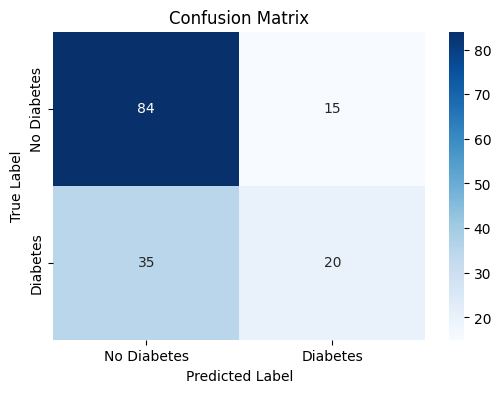

In [39]:

X = data_scaled.drop(columns=['Outcome'])  
y = data_scaled['Outcome'].astype(int)  

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

perceptron = Perceptron(max_iter=1000, random_state=42, eta0=0.001)


perceptron.fit(X_train, y_train)


y_pred = perceptron.predict(X_test)

print("Classification Report:")
print(classification_report(y_test, y_pred))


cm = confusion_matrix(y_test, y_pred)

plt.figure(figsize=(6, 4))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=['No Diabetes', 'Diabetes'], yticklabels=['No Diabetes', 'Diabetes'])
plt.ylabel('True Label')
plt.xlabel('Predicted Label')
plt.title('Confusion Matrix')
plt.show()


Fitting 5 folds for each of 24 candidates, totalling 120 fits
Best Parameters found by GridSearchCV:
{'alpha': 0.001, 'learning_rate_init': 0.1, 'max_iter': 1000, 'random_state': 42, 'solver': 'sgd'}
Classification Report:
              precision    recall  f1-score   support

           0       0.81      0.84      0.82        99
           1       0.69      0.64      0.66        55

    accuracy                           0.77       154
   macro avg       0.75      0.74      0.74       154
weighted avg       0.76      0.77      0.76       154



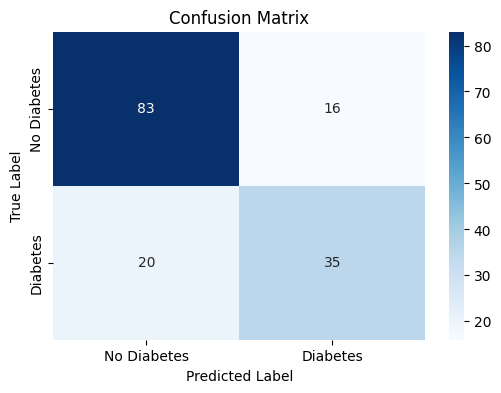

In [40]:

X = data_scaled.drop(columns=['Outcome'])  
y = data_scaled['Outcome'].astype(int)  


X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


param_grid = {
    'learning_rate_init': [0.01, 0.001, 0.1, 1],  
    'solver': ['sgd', 'adam'],  
    'alpha': [0.001, 0.01, 0.1], 
    'max_iter': [1000],  
    'random_state': [42]
}


mlp = MLPClassifier(hidden_layer_sizes=(), random_state=42)


grid_search = GridSearchCV(mlp, param_grid, cv=5, scoring='accuracy', verbose=1)


grid_search.fit(X_train, y_train)


print("Best Parameters found by GridSearchCV:")
print(grid_search.best_params_)


best_mlp = grid_search.best_estimator_
y_pred = best_mlp.predict(X_test)


print("Classification Report:")
print(classification_report(y_test, y_pred))


cm = confusion_matrix(y_test, y_pred)


plt.figure(figsize=(6, 4))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=['No Diabetes', 'Diabetes'], yticklabels=['No Diabetes', 'Diabetes'])
plt.ylabel('True Label')
plt.xlabel('Predicted Label')
plt.title('Confusion Matrix')
plt.show()


Fitting 5 folds for each of 192 candidates, totalling 960 fits
Best Parameters found by GridSearchCV:
{'alpha': 0.01, 'eta0': 0.1, 'learning_rate': 'invscaling', 'max_iter': 1000, 'penalty': 'elasticnet', 'random_state': 42}
Final Classification Report on Test Data:
              precision    recall  f1-score   support

           0       0.84      0.64      0.72        99
           1       0.54      0.78      0.64        55

    accuracy                           0.69       154
   macro avg       0.69      0.71      0.68       154
weighted avg       0.73      0.69      0.69       154



c:\Users\vidhu\AppData\Local\Programs\Python\Python312\Lib\site-packages\numpy\ma\core.py:2820: RuntimeWarning: invalid value encountered in cast
  _data = np.array(data, dtype=dtype, copy=copy,


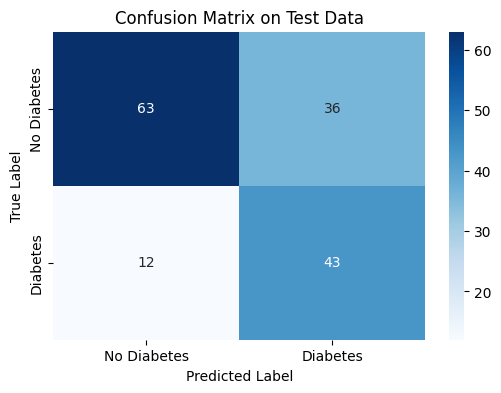

In [41]:

X = data_scaled.drop(columns=['Outcome'])  
y = data_scaled['Outcome'].astype(int)  

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

param_grid = {
    'eta0': [0.01, 0.05, 0.1, 0.5],  
    'penalty': ['l2', 'l1', 'elasticnet'],  
    'alpha': [0.0001, 0.001, 0.01, 0.1],  
    'max_iter': [1000],  
    'learning_rate': ['constant', 'optimal', 'invscaling', 'adaptive'], 
    'random_state': [42]
}


sgd = SGDClassifier(loss='perceptron', random_state=42)

grid_search = GridSearchCV(sgd, param_grid, cv=5, scoring='accuracy', verbose=1)

grid_search.fit(X_train, y_train)

best_params = grid_search.best_params_
print("Best Parameters found by GridSearchCV:")
print(best_params)

final_model = SGDClassifier(
    loss='perceptron', 
    eta0=best_params['eta0'], 
    penalty=best_params['penalty'], 
    alpha=best_params['alpha'], 
    max_iter=best_params['max_iter'], 
    learning_rate=best_params['learning_rate'], 
    random_state=42
)

final_model.fit(X_train, y_train)

y_pred = final_model.predict(X_test)

print("Final Classification Report on Test Data:")
print(classification_report(y_test, y_pred))

cm = confusion_matrix(y_test, y_pred)

plt.figure(figsize=(6, 4))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=['No Diabetes', 'Diabetes'], yticklabels=['No Diabetes', 'Diabetes'])
plt.ylabel('True Label')
plt.xlabel('Predicted Label')
plt.title('Confusion Matrix on Test Data')
plt.show()
